In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('./Framingham.csv')

In [10]:
df.head()
df = df.dropna()

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['TenYearCHD'])

In [14]:
import statsmodels.formula.api as smf
logit_regression = smf.logit("TenYearCHD ~ age", data=df_train)
logit_results = logit_regression.fit()
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.399034
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2924
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                 0.06526
Time:                        10:41:33   Log-Likelihood:                -1167.6
converged:                       True   LL-Null:                       -1249.1
Covariance Type:            nonrobust   LLR p-value:                 2.449e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7328      0.343    -16.718      0.000      -6.405      -5.061
age            0.0781      0.006     12.285      0.000       0.066       0.091
==============================================================================
"""

In [17]:
columns = " + ".join([col for col in df.columns if col != 'TenYearCHD'])

In [19]:
import statsmodels.formula.api as smf
logit_all = smf.logit(f"TenYearCHD ~ {columns}", data=df_train)
logit_all_results = logit_all.fit()
logit_all_results.summary()

Optimization terminated successfully.
         Current function value: 0.374871
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2926
Model:                          Logit   Df Residuals:                     2910
Method:                           MLE   Df Model:                           15
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:                  0.1219
Time:                        10:46:08   Log-Likelihood:                -1096.9
converged:                       True   LL-Null:                       -1249.1
Covariance Type:            nonrobust   LLR p-value:                 6.659e-56
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.4975      0.808    -10.522      0.000     -10.080      -6.915
male                0.5008      0.122      4.115      0.000       0.262       0.739
age                 0.0631      0.007      8.449      0.000       0.048       0.078
education          -0.0670      0.056     -1.207      0.227      -0.176       0.042
currentSmoker      -0.0011      0.178     -0.006      0.995      -0.350       0.348
cigsPerDay          0.0192      0.007      2.680      0.007       0.005       0.033
BPMeds              0.2390      0.255      0.938      0.348      -0.261       0.739
prevalentStroke     0.4054      0.512      0.792      0.428      -0.598       1.409
prevalentHyp        0.2909      0.154      1.888      0.059      -0.011       0.593
diabetes           -0.1830      0.372     -0.492      0.623      -0.912       0.546
totChol             0.0028      0.001      2.210      0.027       0.000       0.005
sysBP               0.0159      0.004      3.731      0.000       0.008       0.024
diaBP              -0.0040      0.007     -0.559      0.576      -0.018       0.010
BMI                 0.0060      0.014      0.421      0.674      -0.022       0.034
heartRate          -0.0045      0.005     -0.959      0.338      -0.014       0.005
glucose             0.0094      0.003      3.591      0.000       0.004       0.015
===================================================================================
"""

In [93]:
# calculate recall, precision, f1 values, auc for the logistic regression model for the threshold of 0.5
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

y_pred = logit_all_results.predict(df_test) > 0.5

In [94]:
logit_all_results.predict(df_test).value_counts()

0.322151    1
0.179302    1
0.083171    1
0.365206    1
0.311998    1
           ..
0.087116    1
0.183693    1
0.115733    1
0.056414    1
0.085480    1
Name: count, Length: 732, dtype: int64

In [95]:
y_pred_05 = logit_all_results.predict(df_test) > 0.5
y_pred_08 = logit_all_results.predict(df_test) > 0.8

y_pred_08.value_counts()

False    730
True       2
Name: count, dtype: int64

In [96]:
y_pred_05.value_counts()

False    710
True      22
Name: count, dtype: int64

In [97]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test['TenYearCHD'], y_pred)


array([[615,   6],
       [ 95,  16]])

In [98]:
pd.crosstab(df_test['TenYearCHD'], y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
Actual,,,
0,615,6,621
1,95,16,111
All,710,22,732


In [99]:
#recall = recall_score(df_test['TenYearCHD'], y_pred.round())
recall = 16/(95 + 16)
recall

0.14414414414414414

In [100]:
#precision = precision_score(df_test['TenYearCHD'], y_pred.round())
precision = 16/(16 + 6)
precision

0.7272727272727273

In [101]:
#f1 = f1_score(df_test['TenYearCHD'], y_pred.round())
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.2406015037593985

In [102]:
roc_auc = roc_auc_score(df_test['TenYearCHD'], y_pred)
roc_auc

0.567241154197676

In [103]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(df_test['TenYearCHD'], y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.567241154197676

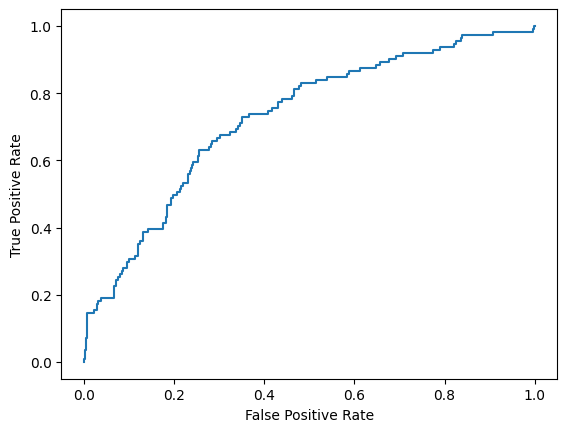

In [106]:
# graph the ROC curve, with labels for the axes
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(df_test['TenYearCHD'], logit_all_results.predict(df_test))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Interpreting the Receiver Operating Characteristic (ROC) curve for logistic regression is essential for evaluating the performance of a binary classification model. The ROC curve is a graphical representation that illustrates the trade-off between the model's true positive rate (Sensitivity) and false positive rate (1 - Specificity) across different probability thresholds. In this explanation, I'll provide a detailed breakdown of ROC curves, their components, and how to interpret them with use cases and examples.

**1. Understanding the ROC Curve:**
The ROC curve is a plot of Sensitivity (True Positive Rate) on the y-axis against 1 - Specificity (False Positive Rate) on the x-axis. Sensitivity is the proportion of actual positives correctly predicted by the model, while Specificity is the proportion of actual negatives correctly predicted.

**2. ROC Curve Components:**
- **Ideal Curve:** The ideal ROC curve is a diagonal line from the bottom-left corner to the top-right corner. A perfect model would have an ROC curve that follows this diagonal, indicating high Sensitivity and Specificity across all probability thresholds.

- **Model Curve:** The model's ROC curve is a representation of its performance. The more the curve bows towards the top-left corner, the better the model's performance.

- **Area Under the Curve (AUC):** AUC is a scalar value that quantifies the overall performance of the model. A perfect model has an AUC of 1, while a random model has an AUC of 0.5.

**3. Use Cases and Interpretation:**

- **Case 1: Perfect Model**
  - AUC = 1
  - The ROC curve closely follows the ideal diagonal line.
  - The model classifies all true positives without any false positives.

- **Case 2: Excellent Model**
  - AUC > 0.9
  - The ROC curve bows towards the top-left corner but may not reach the diagonal.
  - The model has high Sensitivity and Specificity, with a minimal number of false positives.

- **Case 3: Decent Model**
  - AUC between 0.7 and 0.9
  - The ROC curve shows a good trade-off between Sensitivity and Specificity.
  - The model is reasonably effective but might have some false positives.

- **Case 4: Poor Model**
  - AUC < 0.7
  - The ROC curve is close to the 45-degree diagonal line.
  - The model's performance is no better than random guessing.

**Example:**
Suppose you're building a logistic regression model to predict whether an email is spam or not. After training, you generate an ROC curve for your model. The AUC is 0.85, and the ROC curve is close to the top-left corner. This suggests that your model has good discrimination power. It effectively distinguishes between spam and non-spam emails, with a low rate of false positives.

In summary, the ROC curve and AUC are valuable tools for evaluating the performance of logistic regression models in binary classification. They help you assess the model's ability to discriminate between the two classes and make informed decisions about the threshold to use for classification. Higher AUC values and ROC curves that bow towards the top-left corner are indicative of better model performance.

In [105]:
df_train['TenYearCHD'].value_counts()

TenYearCHD
0    2480
1     446
Name: count, dtype: int64

In [63]:
# baseline model
baseline = df_train['TenYearCHD'].value_counts()[0] / len(df_train)
baseline

0.8475734791524265

In [43]:
recall = recall_score(df_test['TenYearCHD'], np.zeros(len(df_test)))
recall

0.0

In [44]:
precision = precision_score(df_test['TenYearCHD'], np.zeros(len(df_test)))
precision

/Users/ian/Code/school/msis510/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [45]:
f1 = f1_score(df_test['TenYearCHD'], np.zeros(len(df_test)))
f1

0.0

In [46]:
roc_auc = roc_auc_score(df_test['TenYearCHD'], np.zeros(len(df_test)))
roc_auc

0.5

In [20]:
df_train.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029796,0.026520,0.198950,0.323377,-0.049373,-0.007452,-0.005865,0.004806,-0.066240,-0.044193,0.053641,0.065167,-0.102194,-0.002939,0.075951
age,-0.029796,1.000000,-0.154514,-0.224874,-0.202587,0.133024,0.057451,0.295212,0.088916,0.280134,0.374007,0.195257,0.140619,-0.002167,0.092603,0.235916
education,0.026520,-0.154514,1.000000,0.033121,0.014072,-0.015334,-0.034752,-0.083427,-0.026305,-0.017048,-0.122335,-0.058036,-0.154020,-0.066916,-0.016399,-0.067968
currentSmoker,0.198950,-0.224874,0.033121,1.000000,0.775212,-0.061918,-0.040068,-0.123497,-0.045143,-0.050000,-0.144418,-0.124489,-0.163155,0.052172,-0.047046,0.001542
cigsPerDay,0.323377,-0.202587,0.014072,0.775212,1.000000,-0.050007,-0.038681,-0.077511,-0.034079,-0.024027,-0.093886,-0.055874,-0.089582,0.077072,-0.042655,0.039099
BPMeds,-0.049373,0.133024,-0.015334,-0.061918,-0.050007,1.000000,0.128509,0.266030,0.046379,0.101379,0.269553,0.188277,0.105378,0.026938,0.036375,0.099303
prevalentStroke,-0.007452,0.057451,-0.034752,-0.040068,-0.038681,0.128509,1.000000,0.078420,0.013056,0.018159,0.069123,0.059723,0.037986,-0.022150,0.022694,0.045601
prevalentHyp,-0.005865,0.295212,-0.083427,-0.123497,-0.077511,0.266030,0.078420,1.000000,0.070048,0.173252,0.697108,0.621205,0.314616,0.150255,0.082388,0.192569
diabetes,0.004806,0.088916,-0.026305,-0.045143,-0.034079,0.046379,0.013056,0.070048,1.000000,0.064234,0.090044,0.041742,0.108215,0.057482,0.604922,0.083092
totChol,-0.066240,0.280134,-0.017048,-0.050000,-0.024027,0.101379,0.018159,0.173252,0.064234,1.000000,0.221125,0.172771,0.108359,0.102971,0.066899,0.106102


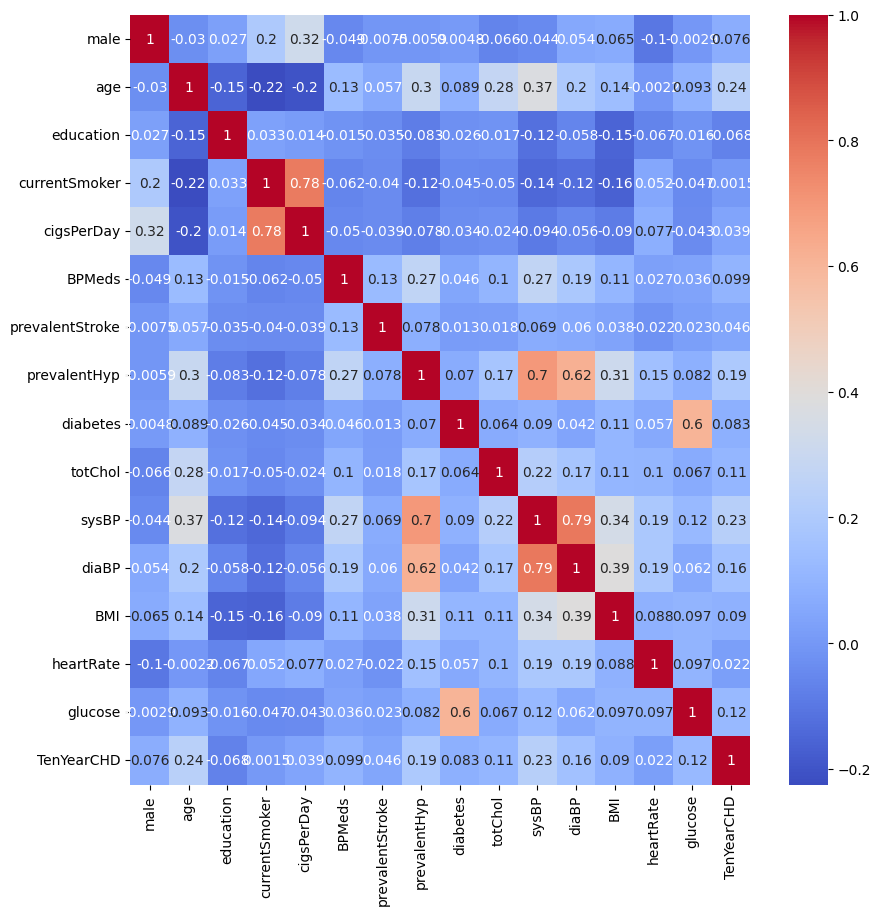

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")
plt.show()